# Amazon Stock vs Twitter 2019 - Behavioural Finance

In [ ]:
! pip install nltk

Libraries

In [ ]:
#Basic
import pandas as pd
import numpy as np
import json
from calendar import monthrange
import datetime

#Viz 
import matplotlib.pyplot as plt
import plotly.express as px
from PIL import *
import requests
import random

#NLP
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import word_tokenize
stop = stopwords.words('english')
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
time: 4.61 s (started: 2021-01-13 15:45:55 +00:00)


## I. The data (tweets scrapped)




In [ ]:
#Tweets 
jan2019 = pd.DataFrame([json.loads(line) for line in open(r'.../AMZNjan2019.json', 'r')])
feb2019 = pd.DataFrame([json.loads(line) for line in open(r'.../AMZNfeb2019.json', 'r')])
mar2019 = pd.DataFrame([json.loads(line) for line in open(r'.../AMZNmar2019.json', 'r')])
apr2019 = pd.DataFrame([json.loads(line) for line in open(r'.../AMZNapr2019.json', 'r')])
may2019 = pd.DataFrame([json.loads(line) for line in open(r'.../AMZNmay2019.json', 'r')])
jun2019 = pd.DataFrame([json.loads(line) for line in open(r'.../AMZNjun2019.json', 'r')])
jul2019 = pd.DataFrame([json.loads(line) for line in open(r'.../AMZNjul2019.json', 'r')])
aug2019 = pd.DataFrame([json.loads(line) for line in open(r'.../AMZNaug2019.json', 'r')])
sept2019 = pd.DataFrame([json.loads(line) for line in open(r'.../AMZNsept2019.json', 'r')])
oct2019 = pd.DataFrame([json.loads(line) for line in open(r'.../AMZNoct2019.json', 'r')])
nov2019 = pd.DataFrame([json.loads(line) for line in open(r'.../AMZNnov2019.json', 'r')])
dec2019 = pd.DataFrame([json.loads(line) for line in open(r'.../AMZNdec2019.json', 'r')])

time: 1min 45s (started: 2021-01-13 15:51:51 +00:00)


In [ ]:
#A loop for every dataframe

dataframes = [jan2019, feb2019, mar2019, apr2019, may2019, jun2019, jul2019, aug2019, sept2019, oct2019, nov2019, dec2019]

for df in dataframes :
  #Removing the hours from the tweets and keepping the date
  df['date'] = pd.to_datetime(df['date']).dt.to_period('D')
  df['month'] = df['date'].dt.strftime('%b')
  df['month_digit'] = df['date'].dt.month
  df['date'] = df['date'].astype(str)
  #Removing useless columns
  df.drop(columns=['url', 'id', 'outlinks', 'outlinksss', 'tcooutlinks', 'tcooutlinksss', 
                   'conversationId', 'source', 'mentionedUsers'], inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimes.py:1092: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



time: 2.8 s (started: 2021-01-13 15:54:04 +00:00)


In [ ]:
#A head of january dataframe
jan2019.head(1)

,date,content,renderedContent,username,user,replyCount,retweetCount,likeCount,quoteCount,lang,media,retweetedTweet,quotedTweet,month,month_digit
0,2019-01-30,"$AMZN Is lagging $FB, but breaking the peak at 1.18.2019 can placed the stock at $1843 first and...","$AMZN Is lagging $FB, but breaking the peak at 1.18.2019 can placed the stock at $1843 first and...",ElliottForecast,"{'username': 'ElliottForecast', 'displayname': 'Elliottwave Forecast', 'id': 79233326, 'descript...",0,0,0,0,en,None,None,None,Jan,1


time: 40.4 ms (started: 2021-01-13 15:56:57 +00:00)


In [ ]:
#Usernames data
userJan = pd.read_json(r'.../userJan.json')
userFeb = pd.read_json(r'.../userFeb.json')
userMar = pd.read_json(r'.../userMar.json')
userApr = pd.read_json(r'.../userApr.json')
userMay = pd.read_json(r'.../userMay.json')
userJun = pd.read_json(r'.../userJun.json')
userJul = pd.read_json(r'.../userJul.json')
userAug = pd.read_json(r'.../userAug.json')
userSept = pd.read_json(r'.../userSept.json')
userOct = pd.read_json(r'.../userOct.json')
userNov = pd.read_json(r'.../userNov.json')
userDec = pd.read_json(r'.../userDec.json')

time: 26 s (started: 2021-01-13 15:54:07 +00:00)


In [ ]:
#Concat of all the dataframes
AMZN2019 = pd.concat(dataframes) 
AMZN2019.sort_values(by=['date'], inplace=True)
AMZN2019.reset_index(inplace=True)
AMZN2019.drop(columns=['index'], inplace=True)

time: 691 ms (started: 2021-01-13 15:54:33 +00:00)


In [ ]:
#Sort by day by unsername count
AMZN2019_tweets = AMZN2019.groupby(['date', 'month'])['username'].count().reset_index()
AMZN2019_tweets.columns = ["Date", "Month", "Number"]

time: 102 ms (started: 2021-01-13 16:00:42 +00:00)


In [ ]:
#Figure 1
fig = px.bar(AMZN2019_tweets, x="Date", y="Number",
             color='Month',
             color_discrete_sequence=px.colors.qualitative.Antique, 
             title="Tweets on $AMZN per day in 2019")
#Remove x axes from the fig
fig.update_xaxes(matches=None)
#Put the title in the middle
fig.update(layout=dict(title=dict(x=0.5)))
#Remove the legend and put the background in white
fig.update_layout(showlegend=False, plot_bgcolor='white', yaxis=dict(title=''), margin=dict(autoexpand=False, l=100, r=20, t=110,))
fig.show()

time: 1.25 s (started: 2021-01-13 15:54:34 +00:00)


In [ ]:
#Days with most tweets
AMZN2019_most_tweets = pd.DataFrame(AMZN2019['date'].value_counts())
AMZN2019_most_tweets.reset_index(inplace=True)
AMZN2019_most_tweets.columns = ["Date", "Number"]
AMZN2019_most_tweets['Date'] = pd.to_datetime(AMZN2019_most_tweets.Date, format='%Y-%m-%d')
AMZN2019_most_tweets['Date'] = AMZN2019_most_tweets["Date"].dt.strftime("%B %d")

time: 64.6 ms (started: 2021-01-13 15:54:35 +00:00)


In [ ]:
#10 most tweet days dataframe
Ten_mosttweetsdays = pd.DataFrame(AMZN2019_most_tweets.head(10))
Ten_mosttweetsdays.sort_values(by="Number", inplace=True, ascending=True)
Ten_mosttweetsdays

,Date,Number
9,February 08,1187
8,April 26,1219
7,July 25,1354
6,February 14,1361
5,May 03,1487
4,December 26,1511
3,April 25,1542
2,February 01,1692
1,October 25,1840
0,October 24,1937


time: 16.6 ms (started: 2021-01-13 15:54:36 +00:00)


In [ ]:
#Figure 2
fig = px.bar(Ten_mosttweetsdays, x="Number", y="Date", title="Most tweets days on $AMZN in 2019", color_discrete_sequence=px.colors.qualitative.Antique, text="Number", orientation='h', width=800, height=400)
fig.update_xaxes(matches=None)
fig.update_layout(showlegend=False, plot_bgcolor='white', yaxis=dict(title=''), margin=dict(autoexpand=False, l=100, r=20, t=110,))
fig.update(layout=dict(title=dict(x=0.5)))
fig.update_xaxes(visible=False)
fig.show()

time: 331 ms (started: 2021-01-13 15:54:36 +00:00)


The day with the most tweets on $AMZN in 2019 is October the 24th. It is easy to understand why because on that day Amazon made a conference call to discuss its third quarter 2019 financial results (source 1 : https://press.aboutamazon.com/news-releases/news-release-details/amazoncom-webcast-third-quarter-2019-financial-results/, source 2 : https://press.aboutamazon.com/news-releases/news-release-details/amazoncom-announces-third-quarter-sales-24-700-billion/, source 3 : https://www.nytimes.com/2019/10/24/technology/amazon-earnings.html)

The 3rd day with the most tweets (February the 1st) is also explainable by an announce. Indeed, the day before, January the 31st, Amazon published an increased of Sales in the Fourth Quarter (source : https://press.aboutamazon.com/news-releases/news-release-details/amazoncom-announces-fourth-quarter-sales-20-724-billion/)

In [ ]:
#Tweets by month and mean by month
AMZN2019_sum = AMZN2019.groupby(['month_digit','month'])['username'].count().reset_index()
AMZN2019_sum.columns = ["Month Digits", "Month", "Number"]
AMZN2019_sum["Month Days"] = AMZN2019_sum["Month Digits"].apply(lambda x: monthrange(2019, x)[1])
AMZN2019_sum["Mean per month"] = AMZN2019_sum["Number"] // AMZN2019_sum["Month Days"]
AMZN2019_sum['Number'] = AMZN2019_sum['Number'].astype(int).apply(lambda x: f'{x:,}')
AMZN2019_sum

,Month Digits,Month,Number,Month Days,Mean per month
0,1,Jan,"16,949",31,546
1,2,Feb,"16,681",28,595
2,3,Mar,"18,561",31,598
3,4,Apr,"17,979",30,599
4,5,May,"17,768",31,573
5,6,Jun,"13,367",30,445
6,7,Jul,"16,407",31,529
7,8,Aug,"14,977",31,483
8,9,Sep,"12,161",30,405
9,10,Oct,"14,976",31,483


time: 92.2 ms (started: 2021-01-13 15:54:36 +00:00)


In [ ]:
#Figure 3
fig = px.line(AMZN2019_sum, x="Month", y="Number", title='Total Number of Tweets by month', text="Number", width=800, height=400)
fig.update_xaxes(matches=None)
fig.update_layout(showlegend=False, plot_bgcolor='white', yaxis=dict(title=''), margin=dict(autoexpand=False, l=100, r=20, t=110,))
fig.update(layout=dict(title=dict(x=0.5)))
fig.update_yaxes(visible=False)
fig.show()

time: 944 ms (started: 2021-01-13 15:54:36 +00:00)


In [ ]:
#Figure 4
fig = px.line(AMZN2019_sum, x="Month", y="Mean per month", title='Mean Tweets by day during the year', text="Mean per month", width=800, height=400)
fig.update_xaxes(matches=None)
fig.update_layout(showlegend=False, plot_bgcolor='white', yaxis=dict(title=''), margin=dict(autoexpand=False, l=100, r=20, t=110,))
fig.update(layout=dict(title=dict(x=0.5)))
fig.update_yaxes(visible=False)
fig.show()

time: 329 ms (started: 2021-01-13 15:54:37 +00:00)


In [ ]:
#Most liked tweets
AMZN2019_rt = pd.DataFrame(AMZN2019[["username", "retweetCount", "likeCount"]])
AMZN2019_rt.sort_values(by="likeCount", inplace=True, ascending=False)
AMZN2019_rt[:10]

,username,retweetCount,likeCount
4447,fillbeforeshill,5910,16670
87735,garrytan,580,2558
5024,Spencerjakab,596,2276
91714,mrspy,515,2141
72071,mrspy,401,2005
66519,charliebilello,408,1362
40142,JamarlinMartin,123,996
14302,eWhispers,466,711
87870,charliebilello,177,689
126306,AsennaWealth,44,681


time: 50 ms (started: 2021-01-13 16:05:42 +00:00)


In [ ]:
#The most liked and retweeted tweet of the year
pd.options.display.max_colwidth = None
print(AMZN2019['content'].loc[AMZN2019['username'] == "fillbeforeshill"])

4447    Jeff Bezos' wife is a better investor than all of us.\n\n$AMZN https://t.co/kgKQK8NAqq
Name: content, dtype: object
time: 37.2 ms (started: 2021-01-13 16:07:15 +00:00)


In [ ]:
#Put back the max column width to 100
pd.options.display.max_colwidth = None

time: 1.52 ms (started: 2021-01-13 16:07:18 +00:00)


In [ ]:
#Most tweets by single user
AMZN2019_users = AMZN2019.groupby('username')['content'].count().reset_index()
AMZN2019_users.columns = ["Username", "Number"]
AMZN2019_users.sort_values(by="Number", inplace=True, ascending=False)
AMZN2019_users.head(10)

,Username,Number
790,Banana3Stocks,7115
2385,ExactOptionPick,5594
9406,davidmoadel,4294
7833,WickedSplits,4128
11725,mikeo188,2518
8105,aaaamhim,1909
991,BlogYomi,1908
11948,naashonomics,1885
7533,UlmHi,1857
11641,mediasentiment,1676


time: 112 ms (started: 2021-01-13 15:54:37 +00:00)


In [ ]:
#Username dataframe o(all year)

userframes = [userJan, userFeb, userMar, userApr, userMay, userJun, userJul, userAug, userSept, userOct, userNov, userDec]

AMZN2019_user = pd.concat(userframes) 
AMZN2019_user.reset_index(inplace=True)
AMZN2019_user.drop(columns=['index'], inplace=True)
AMZN2019_user.drop_duplicates("username", keep='first', inplace=True)
AMZN2019_user.sample(5)

,username,displayname,id,description,verified,followersCount,friendsCount,statusesCount,favouritesCount,location
62521,RickBrazil23,Rick Brazil,716657178,one who learns,False,65,655,959,1726,Paradise
29941,JungleTrades,Jungle Trader,1058310449639305216,FT Trader since '05. More ups than downs as time progresses Always changing my mind.\n\nALL CHARTS ARE PERSONAL LOGS AND NOT TRADING TIPS,False,166,46,467,477,
152339,FossilFreeIndxs,FFI,1478532732,Climate Change Investing Solutions for the Energy Transition #TheCarbonUnderground #CU200 (fossilfreeindexes.com/energy-transit…),False,2334,1962,6351,1196,"New York, NY"
7184,evan_12_seech,Evan Seech,3234673893,USF 2021 📈📉Technical Trader 💯,False,176,291,465,2780,"Tampa, FL"
24062,banaianshow,King Banaian,85408819,The King Banaian Show broadcasts 9-11am Saturdays LIVE on Business 1440 KYCR out of Minneapolis/St. Paul,False,699,386,23992,1666,"Saint Cloud, MN"


time: 228 ms (started: 2021-01-13 16:08:10 +00:00)


In [ ]:
#Most followed usernames
AMZN2019_user.sort_values(by=['followersCount'], inplace=True, ascending=True)
AMZN2019_user['followersCount'] = AMZN2019_user['followersCount'].astype(int).apply(lambda x: f'{x:,}')
AMZN2019_user.tail()

,username,displayname,id,description,verified,followersCount,friendsCount,statusesCount,favouritesCount,location
7464,ReutersBiz,Reuters Business,15110357,"Top business news around the world. Join us @Reuters, @breakingviews, @ReutersGMF",True,"2,198,147",243,228931,21,Around the world
181776,MarketWatch,MarketWatch,624413,"News, personal finance & commentary from MarketWatch.",True,"3,834,676",200,325351,2636,"New York, NY"
16779,CNBC,CNBC,20402945,First in business worldwide.,True,"3,869,043",833,397340,617,"Englewood Cliffs, NJ"
61193,ANCALERTS,ABS-CBN News Channel,44728980,News updates & breaking news from the Philippines. Like our Facebook page: facebook.com/ancalerts.,True,"5,063,714",770,771506,5402,Philippines
20806,Reuters,Reuters,1652541,"Top and breaking news, pictures and videos from Reuters. For more breaking business news, follow...",True,"22,813,881",1130,628466,749,Around the world


time: 40.2 ms (started: 2021-01-13 15:54:38 +00:00)


In [ ]:
#Figure 5
fig = px.bar(AMZN2019_user.tail(10), x="followersCount", y="username", title="Most followed users during the year", text="followersCount",orientation='h', width=800, height=400)
fig.update_xaxes(matches=None)
fig.update_layout(showlegend=False, plot_bgcolor='white', yaxis=dict(title=''), margin=dict(autoexpand=False, l=100, r=20, t=110,))
fig.update(layout=dict(title=dict(x=0.5)))
fig.update_xaxes(visible=False)
fig.show()

time: 326 ms (started: 2021-01-13 15:54:38 +00:00)


In [ ]:
#The most liked and retweeted tweet of the year
pd.options.display.max_colwidth = 100
print(AMZN2019_user['description'].loc[AMZN2019_user['username'] == "jimcramer"])
print(AMZN2019_user['description'].loc[AMZN2019_user['username'] == "om"])
print(AMZN2019_user['description'].loc[AMZN2019_user['username'] == "ValaAfshar"])
print(AMZN2019_user['description'].loc[AMZN2019_user['username'] == "WarrenWhitlock"])
print(AMZN2019_user['description'].loc[AMZN2019_user['username'] == "philstockworld"])

18528    Founder of @TheStreet & I run charitable trust portfolio ActionAlertsPLUS.com. I also host @MadM...
Name: description, dtype: object
12016    I was a reporter once. I sometimes write about tech. I make photos. I invest @TrueVentures Blog:...
Name: description, dtype: object
30574    Chief Digital Evangelist @Salesforce | Columnist: @ZDNet | Show: @DisrupTVShow | Book: bit.ly/tp...
Name: description, dtype: object
93626    Founder/CEO Stirling, publishing, emergingtechechnologies, digitalmarketing, blockchain, AI. Fut...
Name: description, dtype: object
59734    Don't gamble with your investments! BE THE HOUSE, NOT the Gambler! PhilStockWorld.com\n\nEducati...
Name: description, dtype: object
time: 18 ms (started: 2021-01-13 16:25:37 +00:00)


In [ ]:
#Number of tweets per language
tweetsperlang = pd.DataFrame(AMZN2019['lang'].value_counts())
tweetsperlang.reset_index(inplace=True)
tweetsperlang.columns = ["Language", "Number"]

time: 67.1 ms (started: 2021-01-13 15:54:38 +00:00)


In [ ]:
#Creating a 'other' Language from the 33 least used language
tweetsperlang.loc[len(tweetsperlang.index)] = ['other', tweetsperlang.iloc[5:38, 1].sum()]
tweetsperlang.drop(tweetsperlang.loc[5:37].index, inplace=True)
tweetsperlang.replace('en', 'English', inplace=True)
tweetsperlang.replace('in', 'Indian', inplace=True)
tweetsperlang.replace('tr', 'Turkish', inplace=True)
tweetsperlang.replace('es', 'Spanish', inplace=True)
tweetsperlang.replace('nl', 'Dutch', inplace=True) 
tweetsperlang

,Language,Number
0,English,170454
1,Indian,4281
2,Turkish,3699
3,Spanish,1268
4,Dutch,1193
38,other,4408


time: 23.6 ms (started: 2021-01-13 15:54:38 +00:00)


In [ ]:
#A pie chart showing languages from the tweets (#Figure 6)
fig = px.pie(tweetsperlang, values='Number', names='Language', title='Tweets by language', width=800, height=400)
fig.update(layout=dict(title=dict(x=0.15)))
fig.show()

time: 303 ms (started: 2021-01-13 15:54:38 +00:00)


## II. What's in the tweets

In [ ]:
#Keeping only english tweets
AMZN2019_eng = AMZN2019[AMZN2019['lang'].isin(['en'])]
AMZN2019_eng.sample(2)

,date,content,renderedContent,username,user,replyCount,retweetCount,likeCount,quoteCount,lang,media,retweetedTweet,quotedTweet,month,month_digit
98280,2019-06-21,"$AMZN Lives on the Edge, and Telecoms Should Tremble $AAPL $MSFT\nhttps://t.co/IXBsTdSUtM","$AMZN Lives on the Edge, and Telecoms Should Tremble $AAPL $MSFT\nfinance.yahoo.com/news/amazon-li…",msectors,"{'username': 'msectors', 'displayname': 'MicroSectors', 'id': 1004433661603835904, 'description'...",0,0,0,0,en,None,None,None,Jun,6
50307,2019-03-27,$AMZN trading signals (70%/70%)\n Average sentiment: 📈0.28(581)\nT-0: 📈Buy\nT-1: 📈Buy\nT-2: 📈Buy...,$AMZN trading signals (70%/70%)\n Average sentiment: 📈0.28(581)\nT-0: 📈Buy\nT-1: 📈Buy\nT-2: 📈Buy...,MarketPredGuy,"{'username': 'MarketPredGuy', 'displayname': 'Market Sentiment Signals And Prediction', 'id': 97...",0,0,0,0,en,None,None,None,Mar,3


time: 144 ms (started: 2021-01-13 16:25:40 +00:00)


### 1 - Data Cleaning 

In [ ]:
#A regex function that will remove links, special characters, digits, emojis, spaces, single letters
def cleaning_tweets(text): 
    
    text = str(text)
    text = text.lower()
    
    text = re.sub(r'http\S+', ' ', text)
    text = re.sub(r'\b[a-zA-Z]\b', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9]+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    
    text = text.split()
    
    return text

time: 8.65 ms (started: 2021-01-13 15:54:39 +00:00)


In [ ]:
# Applying the function created before
AMZN2019_eng["content_modified"] = AMZN2019_eng['content'].apply(lambda x: cleaning_tweets(x))
# Excluding the stopwords from nltk english stopwords
AMZN2019_eng["content_modified"] = AMZN2019_eng["content_modified"].apply(lambda x: ' '.join([word for word in x if word not in (stop)]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



time: 12.4 s (started: 2021-01-13 15:54:39 +00:00)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#1st example
AMZN2019_eng["content"].head(5)

0                         Meng's Arrest Vs. The Rule Of Law   $QQQ  $AAPL  $AMZN https://t.co/AnCqdd8cuq
1    Happy 2019 Everyone!\n\nLots of Bullish Engulfing Patterns on the charts today but I worry it's ...
2    Market looks much much better than this morning.\n\nThank market god for rebound.\n\n$AMZN reall...
3    $AMZN there 1550 as we mentioned after it made that breach over 1530, should take profits if alr...
4    $AMZN calls now 24.00 from 12.90....Pretty good trade alerted this morning if you were able to s...
Name: content, dtype: object

time: 6.33 ms (started: 2021-01-13 15:54:51 +00:00)


In [ ]:
#2nd example
AMZN2019_eng["content_modified"].head(5)

0                                                                  meng arrest vs rule law qqq aapl amzn
1    happy everyone lots bullish engulfing patterns charts today worry taking us back top downtrend l...
2    market looks much much better morning thank market god rebound amzn really hurts small profit al...
3                                       amzn mentioned made breach take profits already ran reload later
4      amzn calls pretty good trade alerted morning able sit chop almost doubled trade alerts sign month
Name: content_modified, dtype: object

time: 5.24 ms (started: 2021-01-13 15:54:51 +00:00)


### 2 - Tokenising the tweets with NLTK

In [ ]:
#Using NLTK to tokenise the tweets and count the frequency in the entier coprus of tweets
tweets =  AMZN2019_eng['content_modified'].str.lower()

word_counts = Counter(word_tokenize('\n'.join(tweets)))

word_counts.most_common(5)

[('amzn', 176599),
 ('aapl', 55620),
 ('fb', 47436),
 ('nflx', 42656),
 ('tsla', 37936)]

time: 12 s (started: 2021-01-13 15:54:51 +00:00)


In [ ]:
#Frequency dataframe
amzn_freq = pd.DataFrame.from_dict(word_counts, orient='index').reset_index()
amzn_freq.columns=["Word", "Frequency"]
amzn_freq.sort_values(by=['Frequency'], inplace=True, ascending=True)
amzn_freq['Frequency'] = amzn_freq['Frequency'].astype(int).apply(lambda x: f'{x:,}')
amzn_freq.tail(5)

,Word,Frequency
150,tsla,"37,936"
88,nflx,"42,656"
32,fb,"47,436"
6,aapl,"55,620"
7,amzn,"176,599"


time: 77.9 ms (started: 2021-01-13 15:55:03 +00:00)


In [ ]:
#Figure 7
fig = px.bar(amzn_freq.tail(10), x="Frequency", y="Word", title="Most common words from $AZMN tweets in 2019", text="Frequency",orientation='h', width=800, height=400)
fig.update_xaxes(matches=None)
fig.update_layout(showlegend=False, plot_bgcolor='white', yaxis=dict(title=''), margin=dict(autoexpand=False, l=100, r=20, t=110,))
fig.update(layout=dict(title=dict(x=0.5)))
fig.update_xaxes(visible=False)
fig.show()

time: 306 ms (started: 2021-01-13 15:55:03 +00:00)


### 3 - Insights

In [ ]:
#Using a black oval pic to shape the wordclouds
image = Image.open('.../Oval Black.jpg')
# Convert the image to a numeric representation
mask = np.array(image)
#For the colours of the wordclouds text  
image_colours = ImageColorGenerator(mask)

time: 1.07 s (started: 2021-01-13 15:55:04 +00:00)


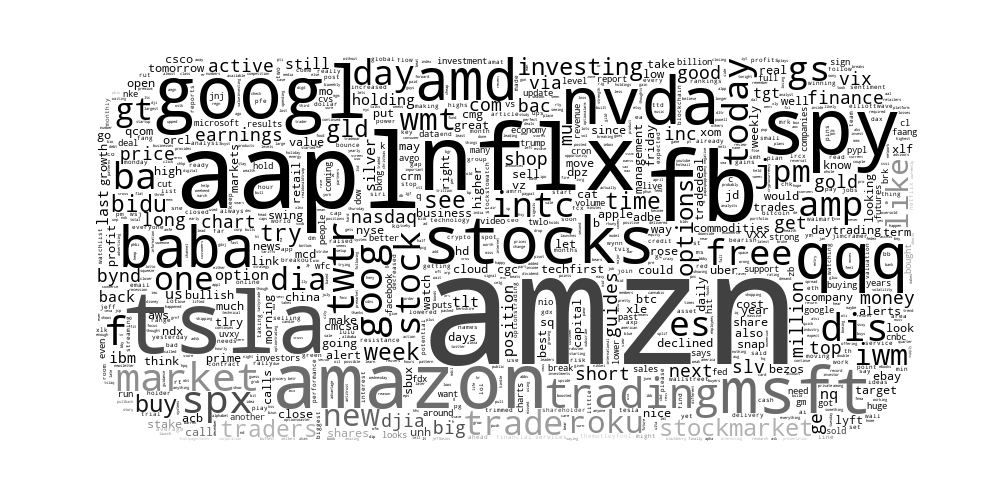

time: 4.55 s (started: 2021-01-13 15:55:05 +00:00)


In [ ]:
# Create a wordcloud generator with a mask
wc = WordCloud(mask=mask,max_words=2000,
                        color_func=image_colours, background_color='white')  
# Generate the cloud using a frequency dictionary
wc.generate_from_frequencies(word_counts)  
wc.to_image()

In [ ]:
#New stopwords
stocks=('amzn', 'aapl', 'tsla', 'nvda', 'nflx', 'googl', 'amazon', 'fb', 'qqq', 'jpm', 'goog', 'amd', 'intc', 'baba', 'msft', 'spy', 'spx', 'twtr', 'wmt')

time: 1.35 ms (started: 2021-01-13 15:55:09 +00:00)


In [ ]:
#Removing the new stopwords and words with less than 3 letters
AMZN2019_eng["content_modified2"] = AMZN2019_eng["content_modified"].apply(lambda x: ' '.join([word for word in x.split() if word not in stocks]))
AMZN2019_eng["content_modified2"]  = AMZN2019_eng["content_modified2"].apply(lambda x: ' '.join([word for word in x.split() if len(word)>3]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



time: 1.54 s (started: 2021-01-13 15:55:09 +00:00)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Data for the second wordcloud (cf medium article)
tweets =  AMZN2019_eng['content_modified2'].str.lower()
word_counts2 = Counter(word_tokenize('\n'.join(tweets)))

time: 8.4 s (started: 2021-01-13 15:55:11 +00:00)


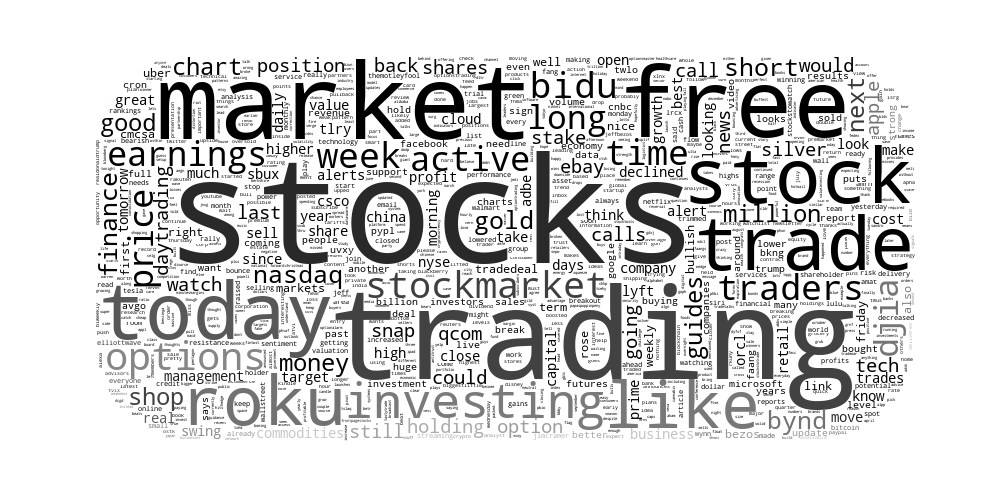

time: 4.37 s (started: 2021-01-13 15:55:19 +00:00)


In [ ]:
# Create a wordcloud generator with a mask
wc = WordCloud(mask=mask,max_words=2000,
                        color_func=image_colours, background_color='white')
# Generate the cloud using a frequency dictionary
wc.generate_from_frequencies(word_counts2)
wc.to_image()

Tokeninzing descriptions of Users

In [ ]:
#Description data
AMZN2019_user["description_modified"] = AMZN2019_user['description'].apply(lambda x: cleaning_tweets(x))
# Excluding the stopwords from nltk english stopwords
AMZN2019_user["description_modified"] = AMZN2019_user["description_modified"].apply(lambda x: ' '.join([word for word in x if word not in (stop)]))
AMZN2019_user["description_modified"] = AMZN2019_user["description_modified"].apply(lambda x: ''.join([word for word in x if word not in 'com']))

time: 732 ms (started: 2021-01-13 15:55:24 +00:00)


In [ ]:
#Data for the third wordcloud (cf medium article)
descs =  AMZN2019_user['description_modified'].str.lower()

word_counts3 = Counter(word_tokenize('\n'.join(descs)))

time: 597 ms (started: 2021-01-13 15:55:24 +00:00)


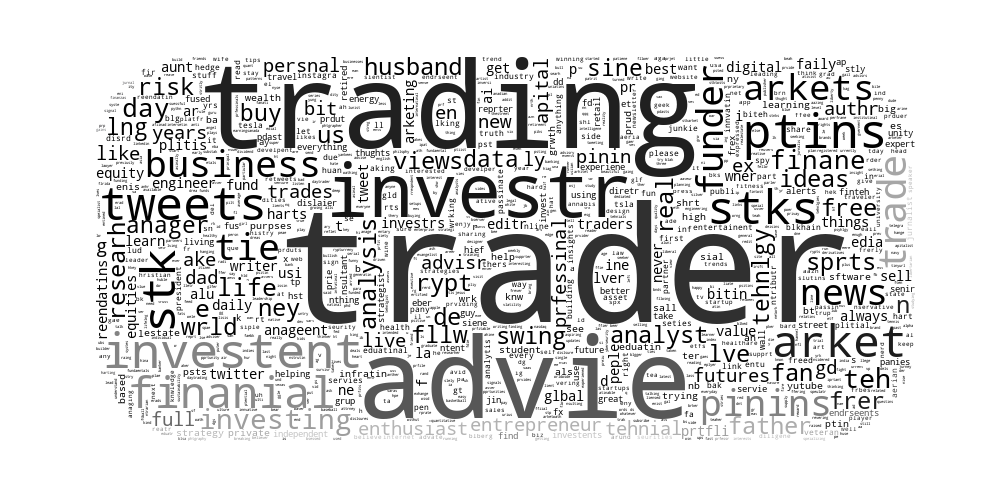

time: 4.73 s (started: 2021-01-13 15:55:25 +00:00)


In [ ]:
# Create a wordcloud generator with a mask
wc = WordCloud(mask=mask,max_words=2000,
                        color_func=image_colours, background_color='white')
# Generate the cloud using a frequency dictionary
wc.generate_from_frequencies(word_counts3)

wc.to_image()

## II. Sentiment Analysis 

In [ ]:
#Data from the sentiment analysis script (transformers)
janSentiment = pd.read_json(r'.../janSentiment.json')
febSentiment = pd.read_json(r'.../febSentiment.json')
marSentiment = pd.read_json(r'.../marSentiment.json')
aprSentiment = pd.read_json(r'.../aprSentiment.json')
maySentiment = pd.read_json(r'.../maySentiment.json')
junSentiment = pd.read_json(r'.../junSentiment.json')
julSentiment = pd.read_json(r'.../julSentiment.json')
augSentiment = pd.read_json(r'.../augSentiment.json')
septSentiment = pd.read_json(r'.../septSentiment.json')
octSentiment = pd.read_json(r'.../octSentiment.json')
novSentiment = pd.read_json(r'.../novSentiment.json')
decSentiment = pd.read_json(r'.../decSentiment.json')

time: 28.4 s (started: 2021-01-13 15:55:30 +00:00)


In [ ]:
aprSentiment.head()

,date,username,content_modified,sentiment,label,score
0,2019-04-29 23:59:37,ExactOptionPick,"Use ""Siegel Code"" safely get paid forever stock market... - $AAPL $AMD $NVDA $BABA $FB $AMZN $GO...","[{'label': 'neutral', 'score': 0.8899453282}]",neutral,0.889945
1,2019-04-29 23:55:05,OptionAlarm,OptionAlarm provides Option Swing Trade Alerts With REAL Results! Try It For 10 Days: It's FREE!...,"[{'label': 'neutral', 'score': 0.8976338506}]",neutral,0.897634
2,2019-04-29 23:55:00,usedtruckassoc,Amazon Tries Take Entire Trucking Industry @themotleyfool #stocks $AMZN,"[{'label': 'neutral', 'score': 0.9275034070000001}]",neutral,0.927503
3,2019-04-29 23:54:23,cml41987,Be sure sub @RampedDaytrader youtube channel tons free trading content daily! Check video nailed...,"[{'label': 'neutral', 'score': 0.9130428433000001}]",neutral,0.913043
4,2019-04-29 23:54:14,Gomez_in_Miami,@ReformedBroker Psst...you moving stocks tweets lately. $LYFT $DIS $TWTR $AMZN &amp; $CGC. You T...,"[{'label': 'neutral', 'score': 0.9271656871}]",neutral,0.927166


time: 35.5 ms (started: 2021-01-13 15:55:58 +00:00)


In [ ]:
#Processing the dataframes
sentframes = [janSentiment, febSentiment, marSentiment, aprSentiment, maySentiment, 
              junSentiment, julSentiment, augSentiment, septSentiment, octSentiment,
              novSentiment, decSentiment]

for df in sentframes :
  #Removing the hours from the tweets and keepping the date
  df['date'] = pd.to_datetime(df['date']).dt.to_period('D')
  df['month'] = df['date'].dt.strftime('%b')
  df['month_digit'] = df['date'].dt.month
  df['date'] = df['date'].astype(str)

time: 2.23 s (started: 2021-01-13 15:55:58 +00:00)


In [ ]:
#Concating the sentiment dataframes and keeping negative x positive labels only
AMZNsent = pd.concat(sentframes)
AMZNsent = AMZNsent[AMZNsent['label'].isin(['negative','positive'])]
AMZNsent.sort_values(by=['date'], inplace=True)
AMZNsent.reset_index(inplace=True)
AMZNsent.drop(columns=['index'], inplace=True)

time: 212 ms (started: 2021-01-13 15:56:01 +00:00)


In [ ]:
#Counting the number of labels for each month
AMZNsent_m = AMZNsent.groupby(['month', 'label', 'month_digit'])['username'].count().reset_index()
AMZNsent_m.columns = ["Month", "Label", 'Month_digit', 'Number']
AMZNsent_m.sort_values(by=['Month_digit'], inplace=True)
AMZNsent_m.head(3)

,Month,Label,Month_digit,Number
8,Jan,negative,1,1866
9,Jan,positive,1,1907
6,Feb,negative,2,2363


time: 33.1 ms (started: 2021-01-13 15:56:01 +00:00)


In [ ]:
#Figure 8
fig = px.bar(AMZNsent_m, x="Month", y="Number",
             color='Label', barmode='group',
             color_discrete_sequence=px.colors.qualitative.Antique, 
             title="Sentiment by month", width=800, height=400, text="Number")
fig.update_xaxes(matches=None)
fig.update_yaxes(visible=False)
fig.update(layout=dict(title=dict(x=0.5)))
fig.update_layout(plot_bgcolor='white')
fig.show()

time: 347 ms (started: 2021-01-13 15:56:01 +00:00)


The sentiment of the top 20 twitter account (by followers) on the year 

In [ ]:
#Keeping only the top 20 accounts (by followers) 
top20 = AMZNsent.loc[AMZNsent['username'].isin(["CNBC", "Reuters", "ANCALERTS", "MarketWatch", "ReuterBiz", "NYSE", "jimcramer", "om", "YahooFinance", "themotleyfool", "TheStreet", "Stocktwits", "Varneyco", 
                                              "CBOE", "Nasdaq","CNBCnow", "ReutersIndia", "cvpayne", "ValaAshar", "FaceTheNation"])]
top20.head()

,date,username,content_modified,sentiment,label,score,month,month_digit
87,2019-01-02,CNBC,". @TradingNation spoke experts, say $AMZN could top-performer year.","[{'label': 'positive', 'score': 0.8736732006}]",positive,0.873673,Jan,1
681,2019-01-08,YahooFinance,"Highlight: $AMZN market cap back $800 billion, notes @ScottGamm @NYSE. $AAPL still trailing behi...","[{'label': 'negative', 'score': 0.6137057543000001}]",negative,0.613706,Jan,1
804,2019-01-08,YahooFinance,"Highlight: Brown Harris Stevens CEO @reinadenyc $AMZN opening HQ2 Long Island City: ""I think tha...","[{'label': 'positive', 'score': 0.8045533299000001}]",positive,0.804553,Jan,1
1197,2019-01-11,themotleyfool,"When you’re sitting traffic, feels like switching lanes get faster. When you’re sitting stocks, ...","[{'label': 'positive', 'score': 0.8449693322}]",positive,0.844969,Jan,1
2866,2019-01-24,ReutersIndia,"EXCLUSIVE: U.S. voices concern India's e-commerce restrictions hit Amazon, Walmart - sources @af...","[{'label': 'negative', 'score': 0.5916165113}]",negative,0.591617,Jan,1


time: 44.5 ms (started: 2021-01-13 15:56:01 +00:00)


In [ ]:
#Counting the labels again but from the 20 most followed acocunts in the dataset
AMZNsent_b = top20.groupby(['month', 'label', 'month_digit'])['username'].count().reset_index()
AMZNsent_b.columns = ["Month", "Label", 'Month_digit', 'Number']
AMZNsent_b.sort_values(by=['Month_digit'], inplace=True)
AMZNsent_b.head(5)

,Month,Label,Month_digit,Number
7,Jan,negative,1,2
8,Jan,positive,1,3
5,Feb,negative,2,8
6,Feb,positive,2,3
14,Mar,positive,3,1


time: 29.1 ms (started: 2021-01-13 15:56:01 +00:00)


In [ ]:
#Figure 9
fig = px.bar(AMZNsent_b, x="Month", y="Number",
             color='Label', barmode='group',
             color_discrete_sequence=px.colors.qualitative.Antique, 
             title="Sentiment of the top 20 Accounts by month", width=800, height=400, text="Number")
fig.update_xaxes(matches=None)
fig.update_yaxes(visible=False)
fig.update(layout=dict(title=dict(x=0.5)))
fig.update_layout(plot_bgcolor='white')
fig.show()

time: 356 ms (started: 2021-01-13 15:56:01 +00:00)


In [ ]:
#Looking at the tweets from april and July
top20_april = top20[top20['month'] == "Apr"]
top20_july = top20[top20['month'] == "Jul"]
top20_april.sample(3)

,date,username,content_modified,sentiment,label,score,month,month_digit
15164,2019-04-25,TheStreet,Amazon $AMZN CFO advertising: We're focused driving relevancy surfacing useful ads possible -- More tools making better recommendations,"[{'label': 'positive', 'score': 0.7066472769000001}]",positive,0.706647,Apr,4
15067,2019-04-25,YahooFinance,LIVE: $AMZN shares earnings revenue beat.,"[{'label': 'positive', 'score': 0.8052154779}]",positive,0.805215,Apr,4
15172,2019-04-25,TheStreet,Amazon $AMZN feels good international growth,"[{'label': 'positive', 'score': 0.889348805}]",positive,0.889349,Apr,4


time: 33.1 ms (started: 2021-01-13 16:19:51 +00:00)
